In [2]:
import json
import os

In [85]:
with open("/media/bnrc2/_backup/dataset/2D_1710/golf_keypoint_predictions_abiao008.json","r") as f:
    js = json.load(f)

In [86]:
import pandas as pd

In [87]:
fi = pd.DataFrame(js)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [88]:
colors = [
            [ 0, 0,255], [0, 255, 0], [255,0,0], [0, 245, 255], [255, 131, 250], [255, 255, 0],
            [0, 0, 255], [0, 255, 0], [255, 0, 0], [0, 245, 255], [255, 131, 250], [255, 255, 0],
                  [0, 0, 0], [255, 255, 255], [255, 0, 0], [0, 255, 0], [0, 0, 255],[128,128,128]]

line = [[0,1],[1,2],[3,4],[4,5],[6,7],[7,8],[9,10],[10,11],[12,13],[13,14],[6,14],[9,14],[0,13],[3,13]]

In [89]:
father_path = "/media/bnrc2/_backup/dataset/2D_1710/"
out_path =  "/media/bnrc2/_backup/dataset/2D_1710/citens2/"
for index, row in fi.iterrows():   # 获取每行的index、row
    img_path = os.path.join(father_path,row["image_id"][5:])
    img = cv2.imread(img_path)
    
    out_folder = os.path.join(out_path,row["image_id"].split("/")[1])
    file_name = row["image_id"].split("/")[-1]
    
    if not os.path.isdir(out_folder):
        os.mkdir(out_folder)
    #plt.imshow(img)
    anno = row["keypoint_annotations"]
    for key in anno.keys():
        coord = np.reshape(anno[key],[14,3])
        
        hip = np.average(np.stack([coord[6],coord[9]],axis=0),axis=0)
        hip = np.transpose(np.expand_dims(hip,-1))
        coord = np.concatenate([coord,hip],axis=0)
        coord = coord.astype(np.int32)
        for i in range(15):

            cv2.circle(img,(int(coord[i][0]),int(coord[i][1])),5, colors[i], -1)
        for j in range(len(line)):
            cv2.line(img,(coord[line[j][0]][0],coord[line[j][0]][1]),(coord[line[j][1]][0],coord[line[j][1]][1]),colors[14],5)
        cv2.imwrite(os.path.join(out_folder,file_name), img)



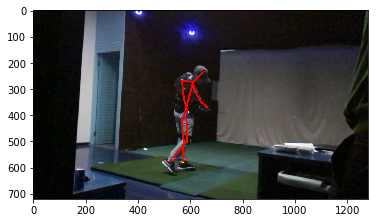

In [78]:
plt.imshow(img)